## Non-linearity

In [22]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [10]:
# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,noise = 0.03, random_state = 42)

In [12]:
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

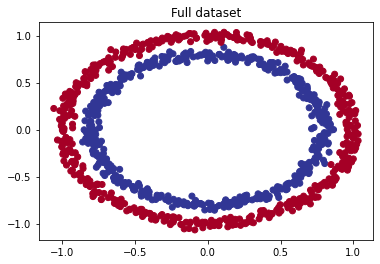

In [26]:
# visualize all dataset
plt.scatter(X[:,0],X[:,1],c = y,cmap = plt.cm.RdYlBu)
plt.title('Full dataset')
plt.show()

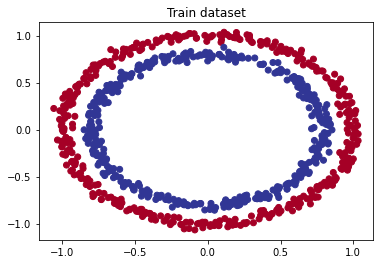

In [28]:
# visualize train dataset
plt.scatter(X_train[:,0],X_train[:,1],c = y_train,cmap = plt.cm.RdYlBu)
plt.title("Train dataset")
plt.show()

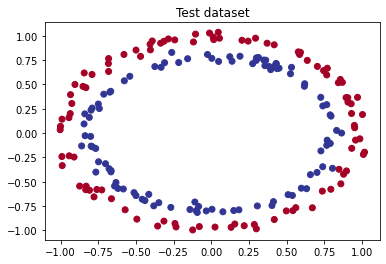

In [30]:
# visualize test dataset
plt.scatter(X_test[:,0],X_test[:,1],c = y_test,cmap = plt.cm.RdYlBu)
plt.title("Test dataset")
plt.show()

In [104]:
# Create a function to visualize your model prediction

def plot_decision_boundary(model,X,y):
    '''
    Plor the decision boundary created by a model predicting on X
    * Take in a trained model, features (X) and labels (y)
    * Ceate meshgrid of different X values
    * Make predictions across the meshgrid
    * Plot the predictions as well as line between the different zone (where each unique class falls)
    '''
    x0_min,x0_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    x1_min,x1_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    # create a meshgrid
    xx,yy  =np.meshgrid(np.linspace(x0_min,x0_max,100),
                       np.linspace(x1_min,x1_max,100))
    # create X value, we are going to make predictions on these
    x_in = np.c_[xx.ravel(),yy.ravel()]# stack 2D array together
    #Make prediction
    y_pred = model.predict(x_in)
    # Check for multi-class
    if len(y_pred[0]) >1:
        print("doing mutliclass classification")
        #We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred,axis = 1).reshape(xx.shape)
    else:
        print("doing binary classiffication")
        y_pred = np.round(y_pred).reshape(xx.shape)
    #Plot the decision boundary
    plt.contourf(xx,yy,y_pred,cmap = plt.cm.RdYlBu,alpha = 0.7)
    plt.scatter(X[:,0],X[:,1],c = y,s = 40,cmap = plt.cm.RdYlBu)
    plt.xlim(x0_min,x0_max)
    plt.ylim(x1_min,x1_max)
    #plt.title("binary classiffication plot")
    #plt.show()

In [72]:
dir(tf.keras.losses)

['BinaryCrossentropy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'Hinge',
 'Huber',
 'KLD',
 'KLDivergence',
 'LogCosh',
 'Loss',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'Poisson',
 'Reduction',
 'SparseCategoricalCrossentropy',
 'SquaredHinge',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'binary_crossentropy',
 'categorical_crossentropy',
 'categorical_hinge',
 'cosine_similarity',
 'deserialize',
 'get',
 'hinge',
 'huber',
 'kl_divergence',
 'kld',
 'kullback_leibler_divergence',
 'log_cosh',
 'logcosh',
 'mae',
 'mape',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'mean_squared_logarithmic_error',
 'mse',
 'msle',
 'poisson',
 'serialize',
 'sparse_categorical_crossentropy',
 'squared_hinge']

In [15]:
dir(tf.keras.activations)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [19]:
# Set the random seed
tf.random.set_seed(42)

# 1.Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.linear)
])

model_4.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
               metrics= ['accuracy'])

history = model_4.fit(X_train,y_train,epochs = 100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 4.3385 - accuracy: 0.4600
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 4.2259 - accuracy: 0.4313
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 4.1368 - accuracy: 0.4187
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 4.0682 - accuracy: 0.4112
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 3.9607 - accuracy: 0.4137
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 3.8429 - accuracy: 0.4175
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 3.7821 - accuracy: 0.4300
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 3.7582 - accuracy: 0.4387
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6799 - accuracy: 0.4475
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 3.5987 - accuracy: 0.4462
Epoch 11/

25/25 [==============================] - 0s 3ms/step - loss: 0.7536 - accuracy: 0.4800
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7522 - accuracy: 0.4800
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7508 - accuracy: 0.4825
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7494 - accuracy: 0.4825
Epoch 87/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7481 - accuracy: 0.4812
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7468 - accuracy: 0.4812
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7455 - accuracy: 0.4812
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7443 - accuracy: 0.4825
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7430 - accuracy: 0.4837
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7418 - accuracy: 0.4837
Epoch 93/100


<AxesSubplot:>

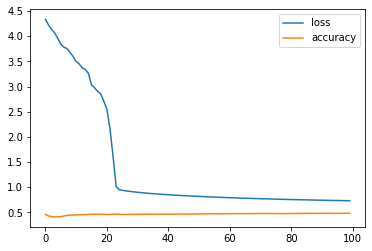

In [20]:
pd.DataFrame(history.history).plot()

In [21]:
model_4.evaluate(X_test,y_test,verbose = 1)

7/7 [==============================] - 0s 4ms/step - loss: 0.7341 - accuracy: 0.4400


[0.7340993285179138, 0.4399999976158142]

In [37]:
# predict
y_preds = model_4.predict(X_test,verbose =1)
y_preds = np.round(y_preds)

7/7 [==============================] - 0s 1ms/step


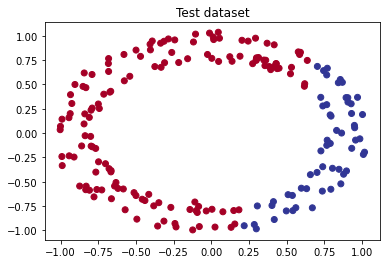

In [38]:
# visualize predict
plt.scatter(X_test[:,0],X_test[:,1],c = y_preds,cmap = plt.cm.RdYlBu)
plt.title("Test dataset")
plt.show()

doing binary classiffication


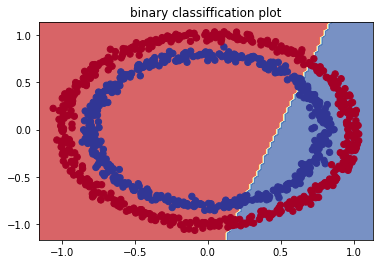

In [39]:
plot_decision_boundary(model_4,X,y)

Let try with non linear activation function

In [41]:
# Set random seed
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation = tf.keras.activations.relu)
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(lr = 0.001),
               metrics = ['accuracy'])

history = model_5.fit(X_train,y_train,epochs = 100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 4.3385 - accuracy: 0.4600
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 4.2259 - accuracy: 0.4313
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 4.1368 - accuracy: 0.4187
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 4.0682 - accuracy: 0.4112
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 3.9607 - accuracy: 0.4137
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 3.8429 - accuracy: 0.4175
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 3.7821 - accuracy: 0.4300
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 3.7582 - accuracy: 0.4387
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 3.6799 - accuracy: 0.4475
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 3.5987 - accuracy: 0.4462
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.7551 - accuracy: 0.4775
Epoch 83/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7536 - accuracy: 0.4800
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7522 - accuracy: 0.4800
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7508 - accuracy: 0.4825
Epoch 86/100
25/25 [==============================] - ETA: 0s - loss: 0.7518 - accuracy: 0.47 - 0s 3ms/step - loss: 0.7494 - accuracy: 0.4825
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7481 - accuracy: 0.4812
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7468 - accuracy: 0.4812
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7455 - accuracy: 0.4812
Epoch 90/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7443 - accuracy: 0.4825
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - los

<AxesSubplot:>

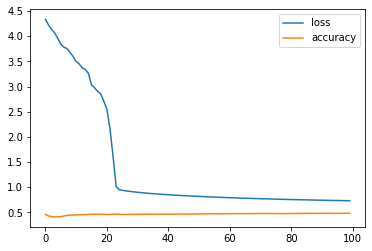

In [44]:
pd.DataFrame(history.history).plot()

doing binary classiffication


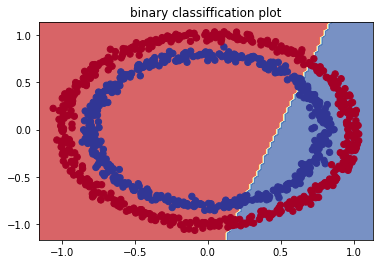

In [45]:
plot_decision_boundary(model_5,X,y)

In [73]:
# time to replicate the multi-player nerual network from TensorFlow playground

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(lr = 0.01),
               metrics = ['accuracy','binary_crossentropy'])

history = model_6.fit(X_train,y_train,epochs = 100,verbose= 1)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6824 - accuracy: 0.5638 - binary_crossentropy: 0.6824
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.5650 - binary_crossentropy: 0.6750
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6680 - accuracy: 0.5763 - binary_crossentropy: 0.6680
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.5725 - binary_crossentropy: 0.6635
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.5713 - binary_crossentropy: 0.6592
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.5938 - binary_crossentropy: 0.6475
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.6275 - binary_crossentropy: 0.6312
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.696

25/25 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9975 - binary_crossentropy: 0.0265
Epoch 65/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9975 - binary_crossentropy: 0.0239
Epoch 66/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9950 - binary_crossentropy: 0.0274
Epoch 67/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0259 - accuracy: 0.9950 - binary_crossentropy: 0.0259
Epoch 68/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9937 - binary_crossentropy: 0.0280
Epoch 69/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9900 - binary_crossentropy: 0.0317
Epoch 70/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9975 - binary_crossentropy: 0.0237
Epoch 71/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9937 - b

<AxesSubplot:>

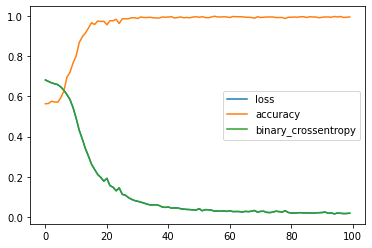

In [74]:
pd.DataFrame(history.history).plot()

doing binary classiffication


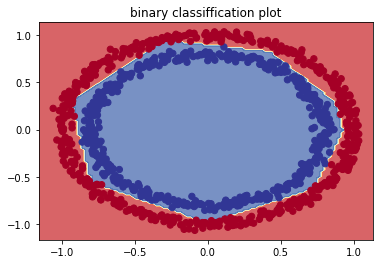

In [75]:
plot_decision_boundary(model_6,X,y)

In [76]:
# linear and non-linear
# Create a toy tensor (similar to data we pass into our model )
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

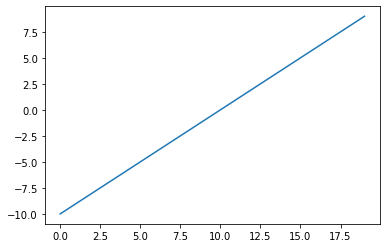

In [77]:
# Visualize our toy tensor
plt.plot(A)

In [78]:
# Let start replicateing signmoid -sigmoid(x) = 1/(1_exp(-x))
def sigmoid(x):
    return 1/(1 +tf.exp(-x))

# Use the signmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

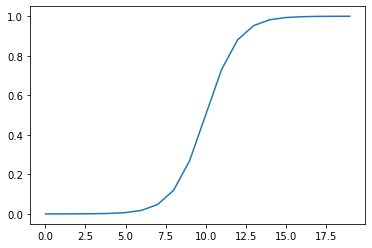

In [80]:
# Plot our toy tensor transformed by signmoid
plt.plot(sigmoid(A))

In [82]:
# Let recreate the relu function
def relu(x):
    return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

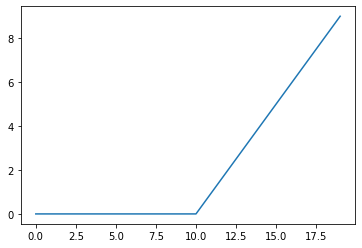

In [83]:
plt.plot(relu(A))

In [84]:
# Let try the linear function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

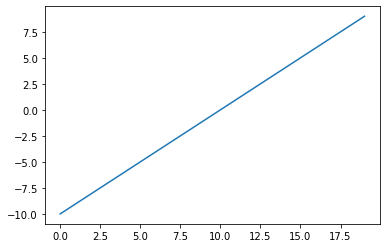

In [86]:
plt.plot(tf.keras.activations.linear(A))

## Evaluating and improving our classification

So far we are been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set

In [88]:
# Check how many examples we have here
len(X)

1000

In [89]:
# Split into train and test sets
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [94]:
# let create model again

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_8.compile(loss =tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(lr = 0.01),
               metrics = ['accuracy','binary_crossentropy'])

history = model_8.fit(X_train,y_train,epochs = 100, verbose = 1)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425 - binary_crossentropy: 0.6847
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525 - binary_crossentropy: 0.6777
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512 - binary_crossentropy: 0.6736
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775 - binary_crossentropy: 0.6681
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850 - binary_crossentropy: 0.6633
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838 - binary_crossentropy: 0.6546
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750 - binary_crossentropy: 0.6413
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.701

25/25 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9900 - binary_crossentropy: 0.0534
Epoch 65/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9850 - binary_crossentropy: 0.0535
Epoch 66/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9850 - binary_crossentropy: 0.0500
Epoch 67/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9837 - binary_crossentropy: 0.0489
Epoch 68/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9887 - binary_crossentropy: 0.0477
Epoch 69/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.9837 - binary_crossentropy: 0.0482
Epoch 70/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9800 - binary_crossentropy: 0.0616
Epoch 71/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0483 - accuracy: 0.9837 - b

In [93]:
model_8.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (32, 4)                   12        
                                                                 
 dense_62 (Dense)            (32, 4)                   20        
                                                                 
 dense_63 (Dense)            (32, 1)                   5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [99]:
model_8.evaluate(X_test,y_test,verbose =1)

7/7 [==============================] - 0s 5ms/step - loss: 0.0245 - accuracy: 0.9950 - binary_crossentropy: 0.0245


[0.024508755654096603, 0.9950000047683716, 0.024508755654096603]

<AxesSubplot:>

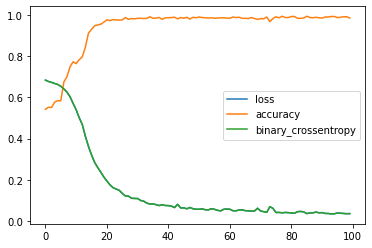

In [95]:
pd.DataFrame(history.history).plot()

doing binary classiffication
doing binary classiffication


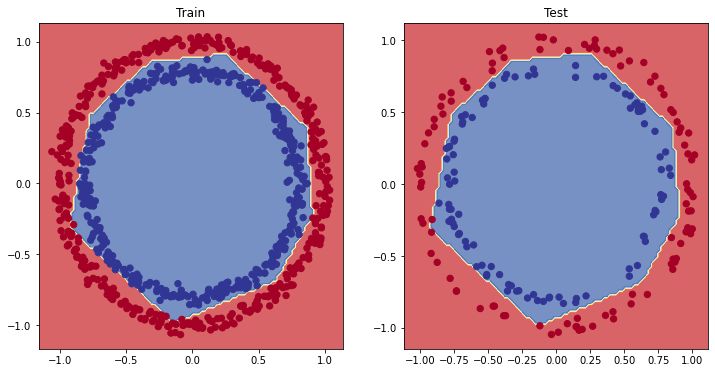

In [106]:
plt.figure(figsize =(12,6))
plt.subplot(1,2,1) # one row, 2 columns, the first one is train
plt.title("Train")
plot_decision_boundary(model_8,X_train,y_train)
#plt.figure(figsize =(12,6))
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X_test,y_test)

## Plot the loss (or training) curves

For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels)

In [107]:
history.history

{'loss': [0.6846511960029602,
  0.6777209639549255,
  0.6735945343971252,
  0.6681485772132874,
  0.6632686853408813,
  0.6545671820640564,
  0.6412575244903564,
  0.6264280676841736,
  0.6038310527801514,
  0.5714035630226135,
  0.5404428243637085,
  0.5015038847923279,
  0.4683319330215454,
  0.4113015830516815,
  0.3625059425830841,
  0.32090437412261963,
  0.2847079932689667,
  0.2597200274467468,
  0.23746901750564575,
  0.2135196179151535,
  0.1938202828168869,
  0.17524367570877075,
  0.16189303994178772,
  0.154989093542099,
  0.14897286891937256,
  0.13393104076385498,
  0.12137064337730408,
  0.12057870626449585,
  0.11008317768573761,
  0.10927674919366837,
  0.10880976915359497,
  0.09927263855934143,
  0.09574387222528458,
  0.08634760975837708,
  0.08214348554611206,
  0.08242487907409668,
  0.07907553017139435,
  0.074669748544693,
  0.078876793384552,
  0.07487378269433975,
  0.07453139126300812,
  0.07168646901845932,
  0.06496702879667282,
  0.0804712325334549,
  0.06

In [109]:
# Convert the history object into dataframe
pd.DataFrame(history.history)

,loss,accuracy,binary_crossentropy
0,0.684651,0.54250,0.684651
1,0.677721,0.55250,0.677721
2,0.673595,0.55125,0.673595
3,0.668149,0.57750,0.668149
4,0.663269,0.58500,0.663269
...,...,...,...
95,0.038384,0.98875,0.038384
96,0.037549,0.99000,0.037549
97,0.036139,0.99250,0.036139
98,0.035137,0.99250,0.035137


Text(0.5, 1.0, 'Model_7 lost curve')

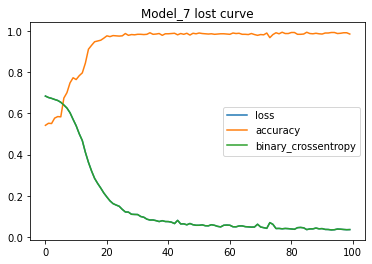

In [112]:
pd.DataFrame(history.history).plot()
plt.title("Model_7 lost curve")

## Finding the best learning rate

To find the ideal learning rate ( the learning rate where the loss decrease the most during training) we are going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training
* Another model (we could use the same one as above, but we are practicing building models here)
* A modified loss curve

In [113]:
dir(tf.keras.callbacks)

['BaseLogger',
 'CSVLogger',
 'Callback',
 'CallbackList',
 'EarlyStopping',
 'History',
 'LambdaCallback',
 'LearningRateScheduler',
 'ModelCheckpoint',
 'ProgbarLogger',
 'ReduceLROnPlateau',
 'RemoteMonitor',
 'TensorBoard',
 'TerminateOnNaN',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'experimental']

In [115]:
x = tf.range(0,100,1)
y = 1e-4 * 10 ** (x/20)
y

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

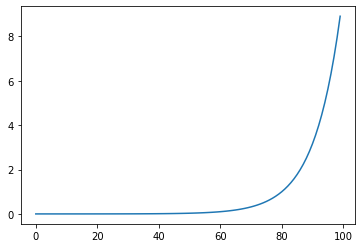

In [116]:
plt.plot(y)

In [118]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

# Compile the model
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = "Adam",
                metrics = ['accuracy']
               )

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20)) #

# Fit the model (passing lr_scheduler callback)

history_8 = model_8.fit(X_train,
                       y_train,
                       epochs = 100,
                       callbacks = [lr_scheduler],
                       verbose = 1)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

Epoch 73/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1113 - accuracy: 0.9563 - lr: 0.3981
Epoch 74/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1257 - accuracy: 0.9550 - lr: 0.4467
Epoch 75/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.8062 - lr: 0.5012
Epoch 76/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7212 - lr: 0.5623
Epoch 77/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.6787 - lr: 0.6310
Epoch 78/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7775 - lr: 0.7079
Epoch 79/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7237 - lr: 0.7943
Epoch 80/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.5900 - lr: 0.8913
Epoch 81/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7119 - accuracy: 0.4

<AxesSubplot:xlabel='epochs'>

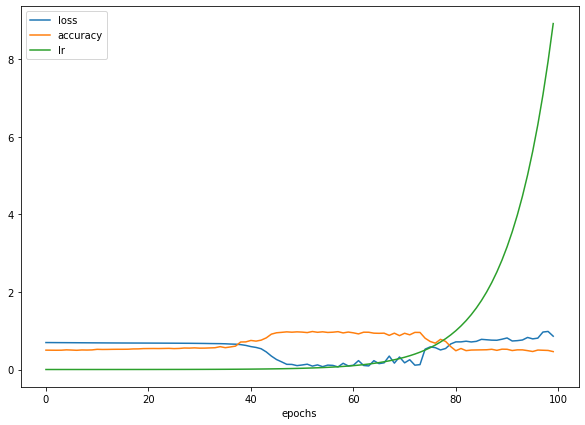

In [119]:
# Checkout the history
pd.DataFrame(history_8.history).plot(figsize = (10,7),xlabel = 'epochs')

Text(0.5, 1.0, 'Learning rate versus loss')

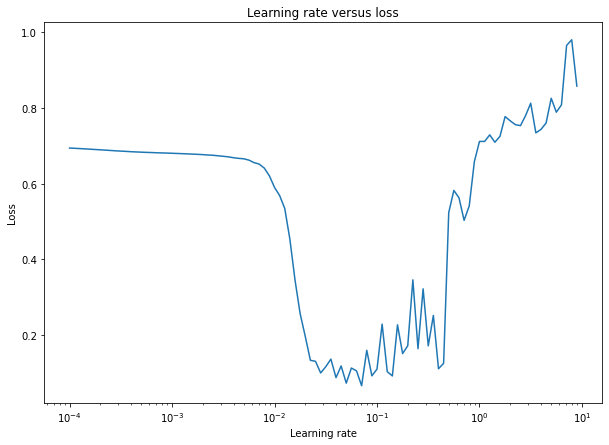

In [122]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs,history_8.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate versus loss")

In [123]:
# Example of other learning rate values:
10**0,10**-1,10**-2,10**-3,1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [125]:
# Let's try using a higher *ideal* learning rate with the same model as before
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid'),
])

# Compile the model with the ideal learning rate
model_9.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(lr = 0.02),
               metrics = ['accuracy'])

# Fit the model for 20 epochs (5 less then before)
history_9 = model_9.fit(X_train,y_train,epochs =20,verbose =1)

Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [127]:
# Evaluate model_10 on the test dataset
model_9.evaluate(X_test,y_test,verbose =1)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740182474255562, 0.9900000095367432]

doing binary classiffication
doing binary classiffication


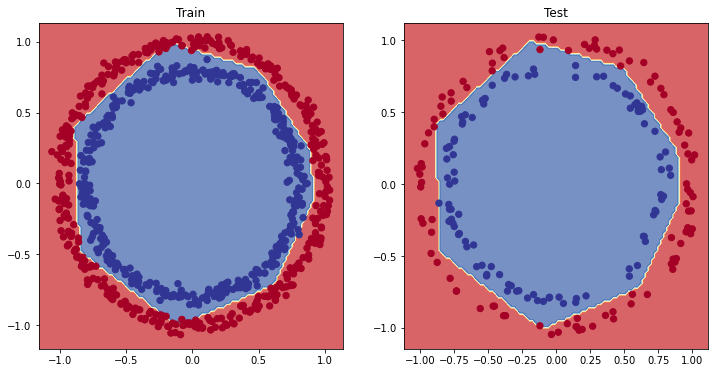

In [129]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9,X = X_train,y =  y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9,X = X_test,y =  y_test)

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision (high precession less false positive)
* Recall (high recall less false negative)
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [130]:
# Check the accuracy of our model
loss, accuracy = model_9.evaluate(X_test,y_test)
print(f'Model loss on  the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on  the test set: 0.05740182474255562
Model accuracy on the test set: 99.00%


## How to make confusion matrix

our predictions array has come out in **prediction probability** form... the standard output from the signmoid (or softmax) activation functions

In [131]:
from sklearn.metrics import confusion_matrix

In [134]:
# Make prediction
y_preds =np.round(model_9.predict(X_test))
# Create a confusion matrix
confusion_matrix(y_test,y_preds)

array([[99,  2],
       [ 0, 99]], dtype=int64)

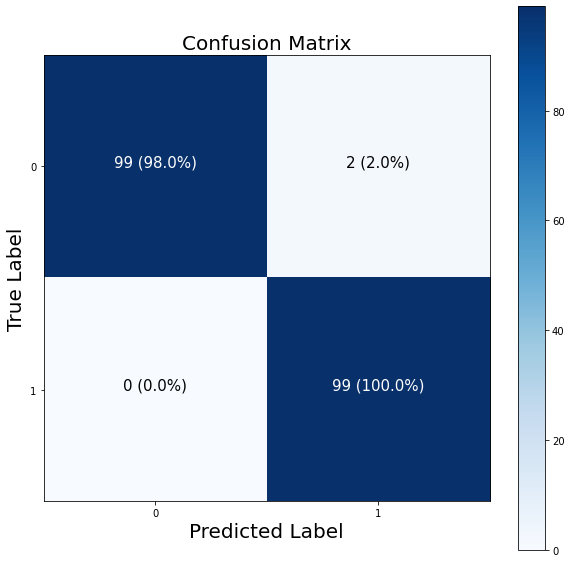

In [149]:
# pretify the confusion matrix
import itertools

figsize = (10,10)

# create the confusion matrix
cm = confusion_matrix(y_test,y_preds)
cm_norm = cm.astype("float") /cm.sum(axis = 1)[:,np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let prettify it
fig,ax = plt.subplots(figsize=figsize)
# create a matrix plot
cax = ax.matshow(cm,cmap = plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
# Label the axes
ax.set(title = "Confusion Matrix",
      xlabel = "Predicted Label",
      ylabel = "True Label",
      xticks = np.arange(n_classes),
      yticks = np.arange(n_classes),
      xticklabels = labels,
      yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min())/2

# Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
             horizontalalignment = 'center',
             color = 'white' if cm[i,j] > threshold else 'black',
             size = 15)

In [140]:
cm

array([[99,  2],
       [ 0, 99]], dtype=int64)

In [139]:
cm.sum(axis = 1)[:,np.newaxis]

array([[101],
       [ 99]], dtype=int64)

In [141]:
cm_norm

array([[0.98019802, 0.01980198],
       [0.        , 1.        ]])